In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import yaml

# Read config

In [2]:
with open('../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)


# Read Clean Data

In [3]:
clean_data_df = pd.read_csv('../' + config["featurize"]["clean_data"])

In [4]:
clean_data_df.shape

(85409, 9)

In [ ]:
clean_data_df.sample(5)

# Data Split

In [6]:
data = clean_data_df.sample(frac=0.9, random_state=786)
data_unseen = clean_data_df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (76868, 9)
Unseen Data For Predictions: (8541, 9)


# PyCaret Experiment

In [7]:
from pycaret.regression import *
from pycaret.utils import check_metric
import xgboost

## PyCaret Setup

In [8]:
s = setup(data = data, target = 'VEHICLES', session_id=123)

,Description,Value
0,session_id,123
1,Target,VEHICLES
2,Original Data,"(76868, 9)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(53807, 43)"


In [9]:
s[0]

False

## PyCaret Models

In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,73.2293,22264.3769,148.2939,0.8950,0.5184,0.6223,3.4630
rf,Random Forest Regressor,70.8565,24365.3795,155.3689,0.8850,0.3835,0.4186,3.0510
lightgbm,Light Gradient Boosting Machine,82.3520,25540.1173,159.0107,0.8795,0.5455,0.7150,0.1820
et,Extra Trees Regressor,75.5101,27165.9631,164.1608,0.8719,0.4004,0.4501,3.7920
knn,K Neighbors Regressor,88.6367,31732.6757,177.6640,0.8502,0.4746,0.6074,0.3520
gbr,Gradient Boosting Regressor,105.7122,36971.4147,191.7431,0.8256,0.6740,1.0818,1.7100
dt,Decision Tree Regressor,88.2458,40175.8846,199.7643,0.8101,0.4822,0.4435,0.1150
ridge,Ridge Regression,192.0907,85022.1834,291.4323,0.5985,1.0749,2.7855,0.0370
br,Bayesian Ridge,192.0891,85022.1918,291.4323,0.5985,1.0748,2.7852,0.1210
lr,Linear Regression,192.0948,85022.1210,291.4322,0.5985,1.0750,2.7860,1.0830


In [11]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,72.6383,21621.0932,147.0411,0.8957,0.5349,0.7345
1,72.3412,20360.4916,142.6902,0.9005,0.5132,0.6206
2,75.3688,21607.7987,146.9959,0.9019,0.5404,0.6560
3,72.3397,16633.6880,128.9717,0.9194,0.4860,0.5432
4,73.2127,21296.2901,145.9325,0.9026,0.5156,0.5462
5,74.4737,26361.5603,162.3624,0.8765,0.5162,0.6217
6,76.6135,36190.6333,190.2384,0.8340,0.5353,0.6363
7,70.9914,16935.0993,130.1349,0.9198,0.5021,0.5911
8,71.7360,20717.1386,143.9345,0.8957,0.5415,0.7240


## Plot Feature Importance

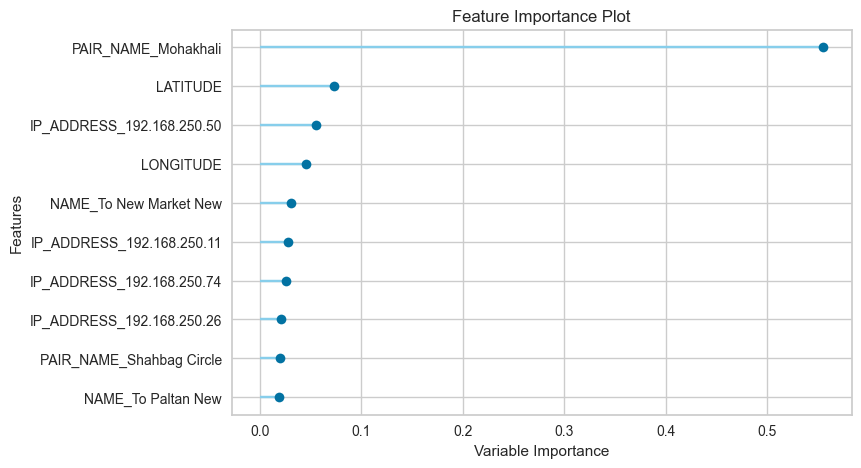

In [12]:
plot_model(xgboost, plot='feature')

## Tune and Finalize Model

In [13]:
tuned_xgboost = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70.7848,19286.2951,138.8751,0.9070,0.4528,0.5698
1,73.1779,20891.0461,144.5374,0.8980,0.4540,0.4837
2,74.4730,21179.6386,145.5323,0.9039,0.4648,0.4702
3,70.6454,16457.1943,128.2856,0.9203,0.4373,0.4401
4,72.1263,21012.1601,144.9557,0.9039,0.4454,0.4174
5,72.3731,25683.5149,160.2608,0.8797,0.4494,0.4683
6,75.1518,35541.7094,188.5251,0.8370,0.4503,0.4668
7,72.6601,19333.3722,139.0445,0.9084,0.4444,0.4612
8,70.8856,20720.3598,143.9457,0.8957,0.4707,0.5591


In [14]:
print(tuned_xgboost)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=220, n_jobs=-1, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)


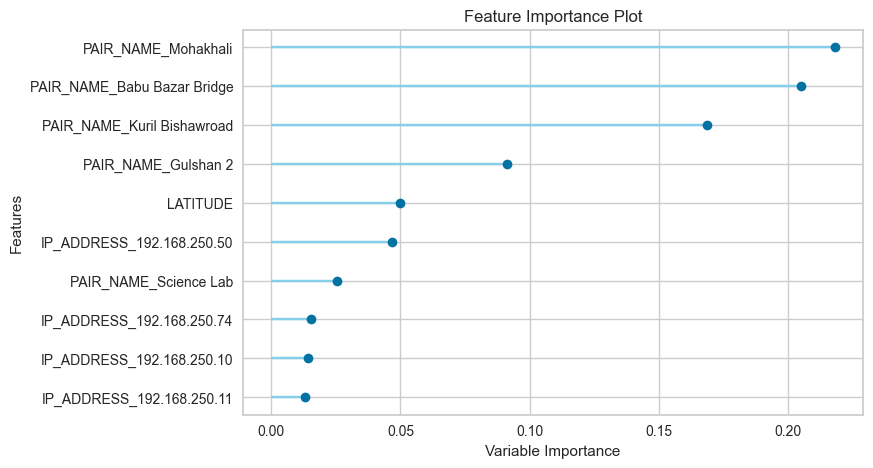

In [15]:
plot_model(tuned_xgboost, plot='feature')

In [16]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict

In [17]:
predict_model(tuned_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,70.2761,20435.3803,142.9524,0.9017,0.4490,0.5253


In [18]:
final_xgboost = finalize_model(tuned_xgboost)
print(final_xgboost)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=220, n_jobs=-1, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)


In [19]:
predict_model(final_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,60.5537,14363.9114,119.8495,0.9309,0.4063,0.4048


In [ ]:
data_unseen

In [21]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,68.0783,21606.9107,146.9929,0.8992,0.4484,0.5785


,DISCOVER_MONTH,DISCOVER_DAY,DISCOVER_HOUR,IP_ADDRESS,LATITUDE,LONGITUDE,PAIR_NAME,NAME,VEHICLES,Label
0,4,9,10,192.168.250.67,23.709414,90.401916,Babu Bazar Bridge,To Tatibazar New,225,81.942375
1,4,9,11,192.168.250.11,23.794837,90.414269,Gulshan 2,To Notun Baazar New,485,398.083160
2,4,9,14,192.168.250.11,23.794837,90.414269,Gulshan 2,To Notun Baazar New,457,413.409180
3,4,9,15,192.168.250.3,23.727862,90.410508,Zero Point,To Paltan New,296,252.212311
4,8,23,1,192.168.250.11,23.794837,90.414269,Gulshan 2,To Notun Baazar New,145,164.658707


In [22]:
check_metric(unseen_predictions.VEHICLES, unseen_predictions.Label, 'R2')

0.8992

In [23]:
check_metric(unseen_predictions.VEHICLES, unseen_predictions.Label, 'RMSE')

146.9929

## Save Model

In [24]:
save_model(final_xgboost,'../models/Final_XGBoost_Model_01Mar2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='VEHICLES',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                

## Loading the Saved Model

In [25]:
saved_final_xgboost = load_model('../models/Final_XGBoost_Model_01Mar2023')

Transformation Pipeline and Model Successfully Loaded


In [26]:
new_prediction = predict_model(saved_final_xgboost, data=data_unseen)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,68.0783,21606.9107,146.9929,0.8992,0.4484,0.5785


,DISCOVER_MONTH,DISCOVER_DAY,DISCOVER_HOUR,IP_ADDRESS,LATITUDE,LONGITUDE,PAIR_NAME,NAME,VEHICLES,Label
0,4,9,10,192.168.250.67,23.709414,90.401916,Babu Bazar Bridge,To Tatibazar New,225,81.942375
1,4,9,11,192.168.250.11,23.794837,90.414269,Gulshan 2,To Notun Baazar New,485,398.083160
2,4,9,14,192.168.250.11,23.794837,90.414269,Gulshan 2,To Notun Baazar New,457,413.409180
3,4,9,15,192.168.250.3,23.727862,90.410508,Zero Point,To Paltan New,296,252.212311
4,8,23,1,192.168.250.11,23.794837,90.414269,Gulshan 2,To Notun Baazar New,145,164.658707


In [27]:
from pycaret.utils import check_metric
check_metric(new_prediction.VEHICLES, new_prediction.Label, 'R2')

0.8992

In [28]:
check_metric(new_prediction.VEHICLES, new_prediction.Label, 'RMSE')

146.9929

In [29]:
# Convert dictionary to DataFrame with a single row
df = data_unseen.iloc[[201]].reset_index(drop=True)

In [30]:
df

,DISCOVER_MONTH,DISCOVER_DAY,DISCOVER_HOUR,IP_ADDRESS,LATITUDE,LONGITUDE,PAIR_NAME,NAME,VEHICLES
0,6,4,2,192.168.250.26,23.809342,90.421319,Kuril Bishawroad,To Notun Baazar New,196


In [31]:
new_prediction = predict_model(saved_final_xgboost, data=df)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2.1863,4.7800,2.1863,nan,0.0110,0.0112


,DISCOVER_MONTH,DISCOVER_DAY,DISCOVER_HOUR,IP_ADDRESS,LATITUDE,LONGITUDE,PAIR_NAME,NAME,VEHICLES,Label
0,6,4,2,192.168.250.26,23.809342,90.421319,Kuril Bishawroad,To Notun Baazar New,196,198.18631


In [32]:
new_data = {'DISCOVER_MONTH':12, 'DISCOVER_DAY':20, 'DISCOVER_HOUR': 21, \
            'IP_ADDRESS': '192.168.250.26',\
            'LONGITUDE':90.421319, 'LATITUDE':23.809342, \
            'NAME': 'To Notun Baazar New', 'PAIR_NAME': 'Kuril Bishawroad', \
            'VEHICLES':1117.}

In [33]:
# Convert dictionary to DataFrame with a single row
df = pd.DataFrame(new_data, index=[0])

In [34]:
new_prediction = predict_model(saved_final_xgboost, data=df)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,119.4562,14269.7782,119.4562,nan,0.1015,0.1069


,DISCOVER_MONTH,DISCOVER_DAY,DISCOVER_HOUR,IP_ADDRESS,LONGITUDE,LATITUDE,NAME,PAIR_NAME,VEHICLES,Label
0,12,20,21,192.168.250.26,90.421319,23.809342,To Notun Baazar New,Kuril Bishawroad,1117.0,1236.456177
